# Problem Set 10 - Chem 273
## Monte Carlo Simulation
<br>

**1) Motivation**

Not only single molecule dynamics can be modelled with the techniques discussed in the lecture. Another application of a MC simulation is population dynamics. In particual, the **predator - prey model**, which simulates the interaction between two species, e. g. wolfes and lambs was one of the early models that could explain periodic pattern in population sizes over time.<br> 
The goal of this exercise is to apply the MC simulation using the Gillespie algorithm to the predator - prey model and thereby gain more understanding of these methods.

<br>

**2) Preparation**

In its simplest version the predator - prey model consists of only three equations:<br>
<br>
- lambs $L$ double themselves with a rate $k_1$<br>
  $L \xrightarrow{k_1} 2\,L$<br>
<br>
- if a wolf $W$ meets a lamb $L$, it kills it and turns it into a new wolf with a rate $k_2$, such that<br>
 $L + W \xrightarrow{k_2} 2\,W$<br>
<br>
- Wolfs can starve (whereas lambs don't, they can always eat grass). If they do not meet a lamb, they will die with the rate $k_3$<br>
 $W \xrightarrow{k_3} \Phi$<br>

<br>

**3) Exercise**

- a) Write a Python script using *def* that simulates the predator - prey model from above via a MC simulation using the Gillespie algorithm. Start with the following values: $L(t = 0) = W(t = 0) = 1000$, $k_1 = 10$, $k_2 = 0.01$ and $k_3 = 10$. Experiment with sligthly different values.<br>
<br>
- b) Plot $L(t)$ and $W(t)$, but also plot $L(W)$ vs $W(t)$. What do you observe?<br>
<br>
- c) In reality a wolf does not immediately turn a lamb into another wolf, but rather uses the energy for maintaining its metabolism. This would add another equation like $W + L \xrightarrow{k_4} W$ to the model. Also lambs can die by natural causes via $L \xrightarrow{k_5} \Phi$. Discuss (**no simulation is required!**) that adding these equations does not change the model at all. Apply what you know about rate equations.<br>

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def PredPrey(Lambs: int = 1000, Wolfes: int = 1000,
             k1: float = 10, k2: float = 0.01, k3: float = 10,
             Niter: int = 1000000):
    
    R1     = np.random.uniform(0, 1, (Niter,))
    R2     = np.random.uniform(0, 1, (Niter,))
    
    Values = np.zeros((Niter, 3))
    t      = 0
    i      = 0
    
    #while (Lambs > 0) & (Wolfes > 0) & (i < Niter):
    for i in range(Niter):
        
        tot = k1* Lambs + k2*Lambs*Wolfes + k3*Wolfes
        
        t  -= np.log(R1[i])/tot
        
        ratio1 = k1* Lambs/tot
        ratio2 = k2*Lambs*Wolfes/tot
        
        r2 = R2[i]
        
        if r2 < ratio1:
            Lambs += 1
            
        elif (r2 > ratio1) & (r2 < (ratio1 + ratio2)):
            Lambs  -= 1
            Wolfes += 1
            
        else:
            Wolfes -= 1
            
        Values[i,:] = [t, Wolfes, Lambs]
        
        i+=1
        
            
    plt.stairs(Values[1:,1], Values[:,0], color = 'g', baseline = None,\
               linewidth = 1, label = 'Wolfes')
    plt.stairs(Values[1:,2], Values[:,0], color = 'b', baseline = None,\
                   linewidth = 1, label = 'Lambs')
        
    plt.xlabel('time')
    plt.title('$k_1 = $' + str(k1) + ", $k_{2} = $" + str(k2) + ", $k_{3} = $" + str(k3))
    plt.legend()
    plt.show()
    
    plt.stairs(Values[1:,2], Values[:,1], color = 'k', baseline = None,\
               linewidth = 1)       
    plt.xlabel('Wolfes')
    plt.ylabel('Lambs')
    plt.title('$k_1 = $' + str(k1) + ", $k_{2} = $" + str(k2) + ", $k_{3} = $" + str(k3))
    plt.show()

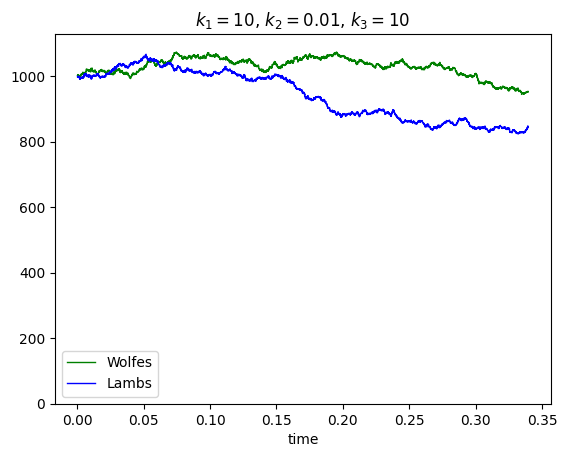

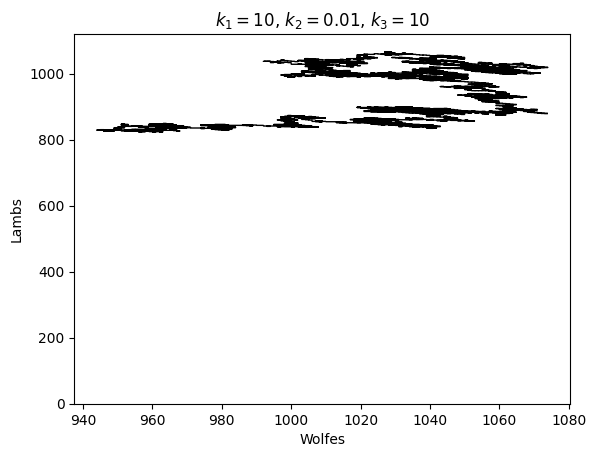

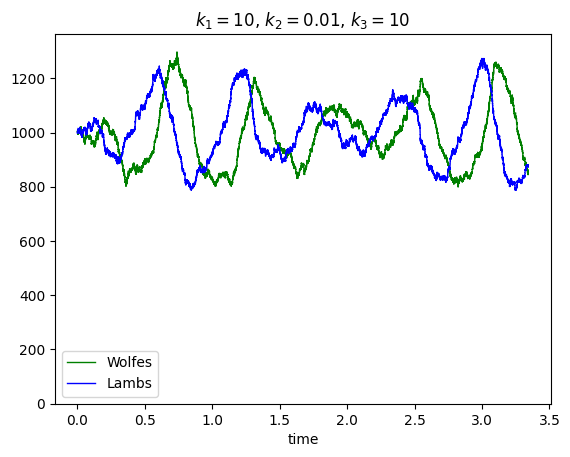

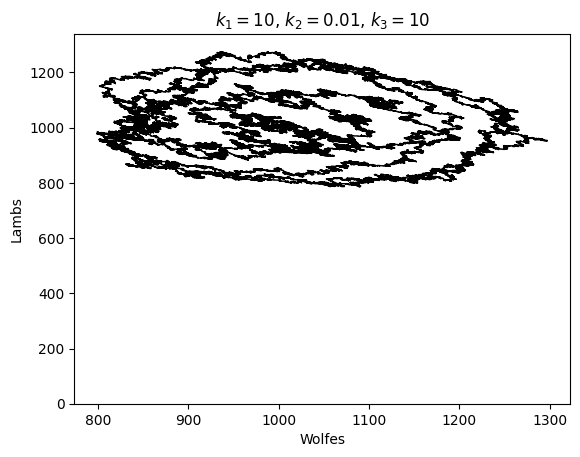

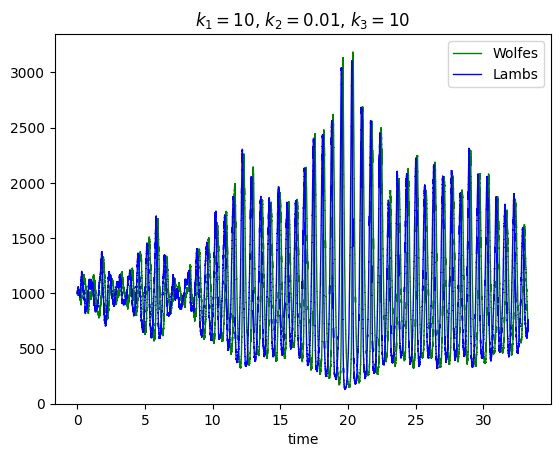

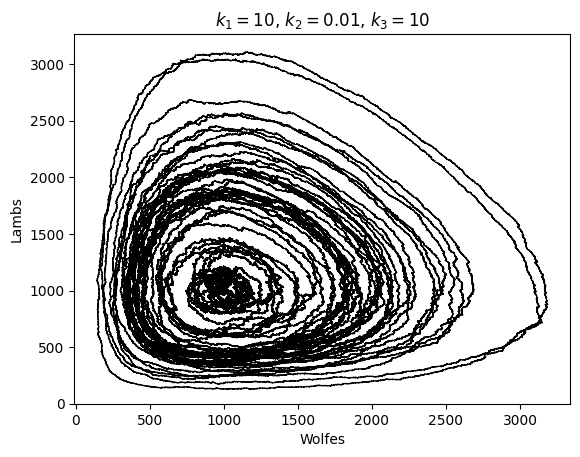

In [32]:
PredPrey(Niter = 10000)
PredPrey(Niter = 100000)
PredPrey(Niter = 1000000)